# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | saipan
Processing Record 4 of Set 1 | fort frances
Processing Record 5 of Set 1 | chonchi
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | sechura
Processing Record 8 of Set 1 | susuman
Processing Record 9 of Set 1 | udachny
Processing Record 10 of Set 1 | san diego
Processing Record 11 of Set 1 | namdrik
Processing Record 12 of Set 1 | hawaiian paradise park
Processing Record 13 of Set 1 | saint-joseph
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | nishinoomote
Processing Record 16 of Set 1 | kulim
Processing Record 17 of Set 1 | nosy varika
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | invercargill
Processing Record 20 of Set 1 | longyearbyen
Processing Record 21 of Set 1 | queenstown
Processing Record 22 of Set 1 | sadovoy

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,287.95,89,100,2.57,US,1712876829
1,puerto natales,-51.7236,-72.4875,276.45,91,36,2.44,CL,1712876712
2,saipan,15.1355,145.7010,303.54,66,0,6.69,MP,1712876829
3,fort frances,48.5999,-93.4003,285.27,47,100,5.14,CA,1712876829
4,chonchi,-42.6128,-73.8092,284.71,78,0,0.56,CL,1712876829


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../Resources/output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../Resources/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,287.95,89,100,2.57,US,1712876829
1,puerto natales,-51.7236,-72.4875,276.45,91,36,2.44,CL,1712876712
2,saipan,15.1355,145.7010,303.54,66,0,6.69,MP,1712876829
3,fort frances,48.5999,-93.4003,285.27,47,100,5.14,CA,1712876829
4,chonchi,-42.6128,-73.8092,284.71,78,0,0.56,CL,1712876829


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

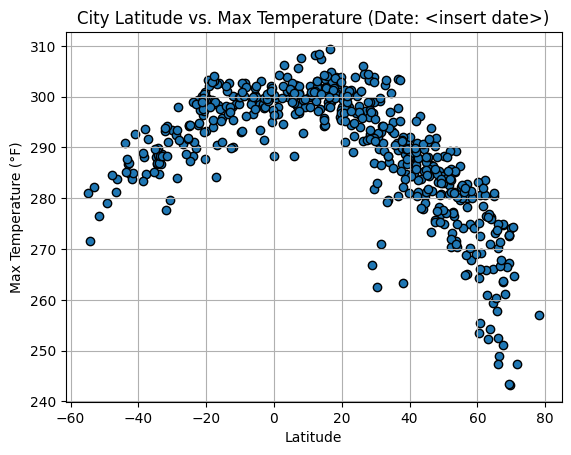

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date: <insert date>)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)

# Save the figure
plt.savefig("../Resources/output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

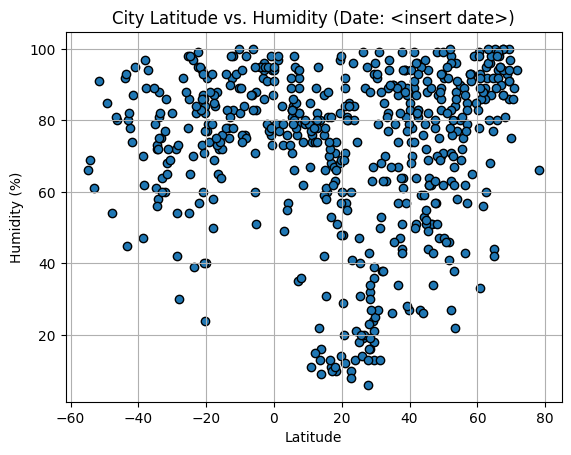

In [9]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date: <insert date>)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../Resources/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

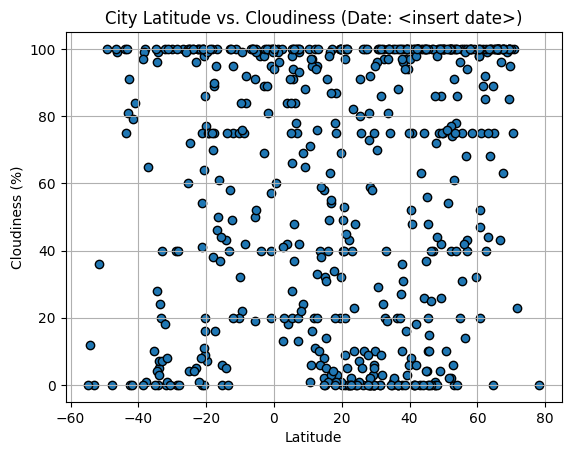

In [10]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Date: <insert date>)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../Resources/output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

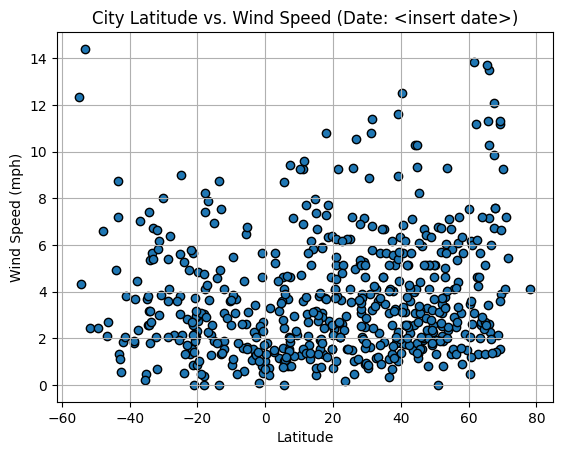

In [11]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date: <insert date>)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("../Resources/output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, x_label, y_label, title, text_coordinates):
    """
    This function generates a linear regression plot.
    
    Parameters:
        x_values (array-like): The values for the x-axis.
        y_values (array-like): The values for the y-axis.
        x_label (str): Label for the x-axis.
        y_label (str): Label for the y-axis.
        title (str): Title for the plot.
        text_coordinates (tuple): Coordinates to place the regression equation text.
    """
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Label plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    
    # Show plot
    plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemisphere_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,287.95,89,100,2.57,US,1712876829
2,saipan,15.1355,145.7010,303.54,66,0,6.69,MP,1712876829
3,fort frances,48.5999,-93.4003,285.27,47,100,5.14,CA,1712876829
7,susuman,62.7833,148.1667,260.92,92,99,1.34,RU,1712876830
8,udachny,66.4167,112.4000,248.95,98,100,2.26,RU,1712876830


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto natales,-51.7236,-72.4875,276.45,91,36,2.44,CL,1712876712
4,chonchi,-42.6128,-73.8092,284.71,78,0,0.56,CL,1712876829
5,blackmans bay,-43.0167,147.3167,286.77,80,81,1.34,AU,1712876829
6,sechura,-5.5569,-80.8222,300.24,60,50,6.47,PE,1712876829
12,saint-joseph,-21.3667,55.6167,298.36,83,41,0.87,RE,1712876543


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7065551448873032


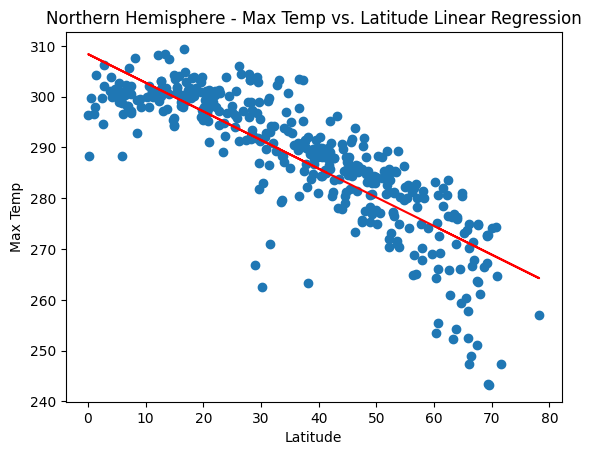

In [15]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"], 
                       "Latitude", "Max Temp", "Northern Hemisphere - Max Temp vs. Latitude Linear Regression", 
                       (0, 0))


The r-squared is: 0.6131590696909024


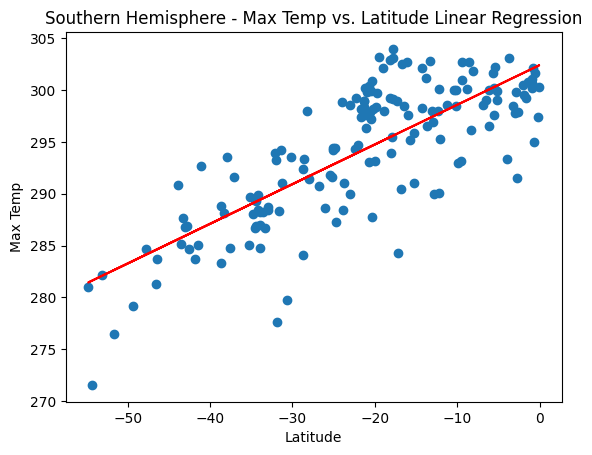

In [23]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemisphere_df["Lat"], southern_hemisphere_df["Max Temp"], 
                       "Latitude", "Max Temp", "Southern Hemisphere - Max Temp vs. Latitude Linear Regression", 
                       (0, 0))


**Discussion about the linear relationship:** These plots show a clear relationship between latitude and max temp, indicating higher max temps, as you move toward the equator. As latitude progresses toward the North Pole, max temps drop.

### Humidity vs. Latitude Linear Regression Plot

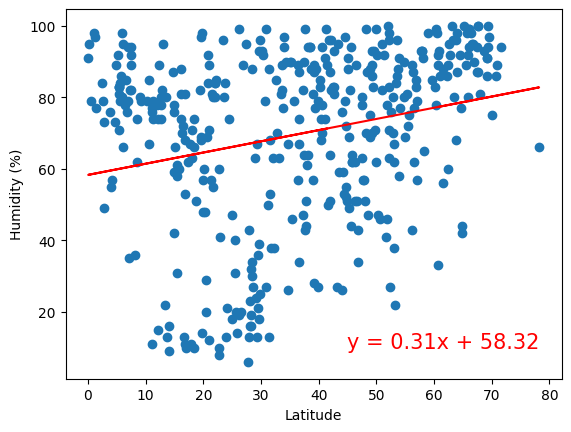

In [17]:
# Northern Hemisphere

# Perform linear regression on Humidity vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"])

# Get regression values
regress_values = northern_hemisphere_df["Lat"] * slope + intercept

# Create scatter plot
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"])

# Plot regression line
plt.plot(northern_hemisphere_df["Lat"], regress_values, "r-")

# Annotate line equation
plt.annotate(f'y = {round(slope,2)}x + {round(intercept,2)}', (45, 10), fontsize=15, color="red")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Show plot
plt.show()


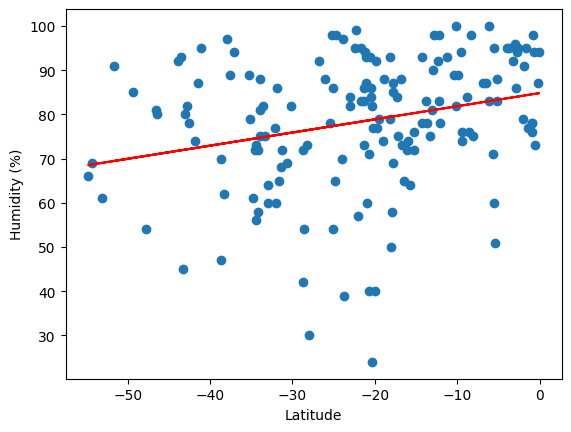

In [18]:
# Southern Hemisphere

# Perform linear regression on Humidity vs. Latitude for Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"])

# Get regression values
regress_values = southern_hemisphere_df["Lat"] * slope + intercept

# Create scatter plot
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"])

# Plot regression line
plt.plot(southern_hemisphere_df["Lat"], regress_values, "r-")

# Annotate line equation
plt.annotate(f'y = {round(slope,2)}x + {round(intercept,2)}', (-22, 20), fontsize=15, color="red")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Show plot
plt.show()



**Discussion about the linear relationship:** Given the plots we can see a slight trend toward higher levels of humidity as latitude ascends from 0, however these plots alone are not enough to draw any significant conclusions.

### Cloudiness vs. Latitude Linear Regression Plot

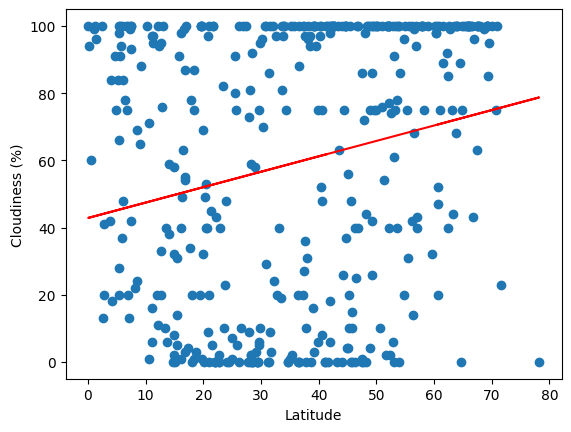

In [19]:
# Northern

# Perform linear regression on Cloudiness vs. Latitude for Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"])

# Get regression values
regress_values = northern_hemisphere_df["Lat"] * slope + intercept

# Create scatter plot
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"])

# Plot regression line
plt.plot(northern_hemisphere_df["Lat"], regress_values, "r-")

# Annotate line equation
plt.annotate(f'y = {round(slope,2)}x + {round(intercept,2)}', (-55, 20), fontsize=15, color="red")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Show plot
plt.show()


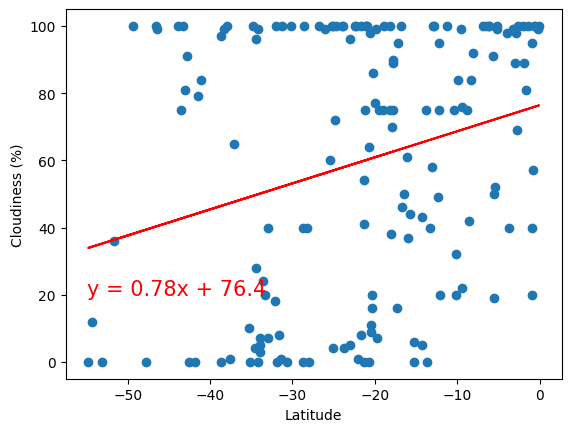

In [20]:
# Southern Hemisphere

# Perform linear regression on Cloudiness vs. Latitude for Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"])

# Get regression values
regress_values = southern_hemisphere_df["Lat"] * slope + intercept

# Create scatter plot
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"])

# Plot regression line
plt.plot(southern_hemisphere_df["Lat"], regress_values, "r-")

# Annotate line equation
plt.annotate(f'y = {round(slope,2)}x + {round(intercept,2)}', (-55, 20), fontsize=15, color="red")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Show plot
plt.show()



**Discussion about the linear relationship: Based on the linear regression plots we cannot see a significant relationship between latitude or cloudiness, in either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

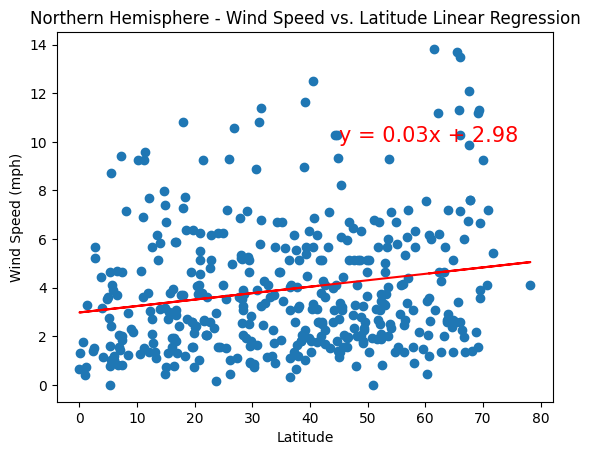

In [21]:
# Perform linear regression on Wind Speed vs. Latitude for Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"])

# Get regression values
regress_values = northern_hemisphere_df["Lat"] * slope + intercept

# Create scatter plot
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"])

# Plot regression line
plt.plot(northern_hemisphere_df["Lat"], regress_values, "r-")

# Annotate line equation
plt.annotate(f'y = {round(slope,2)}x + {round(intercept,2)}', (45, 10), fontsize=15, color="red")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Show plot
plt.show()


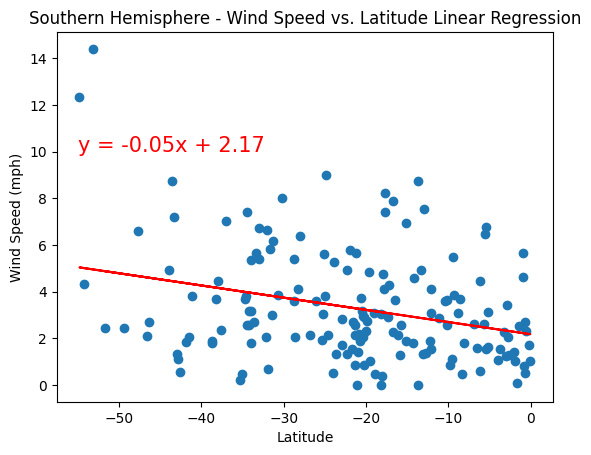

In [22]:
# Perform linear regression on Wind Speed vs. Latitude for Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"])

# Get regression values
regress_values = southern_hemisphere_df["Lat"] * slope + intercept

# Create scatter plot
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"])

# Plot regression line
plt.plot(southern_hemisphere_df["Lat"], regress_values, "r-")

# Annotate line equation
plt.annotate(f'y = {round(slope,2)}x + {round(intercept,2)}', (-55, 10), fontsize=15, color="red")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Show plot
plt.show()

**Discussion about the linear relationship:** Given the plots we are unable to identify any significant relationship between wind speed and latitude.